## ECON 2355 Implementation Exercise 1: Deep Learning Review

Welcome to Econ 2355! This first exercise is meant to be a review of some basic Deep Learning concepts, and reminder of some basic python implementation tools. 

### Notes on the class's implementation exercises in general:

 - These exercises are still being finalized! If you encounter problems please don't hesitate to reach out: tom_bryan@fas.harvard.edu

 - You are welcome to download these notebooks and complete them on your local machine, or work on them in colab. **Working on them in Colab is strongly recommended.** If you are hoping to run things on your local machine you will likely want to set up an [Anaconda](https://www.anaconda.com/products/distribution) python environment and run notebooks from either [VS Code](https://code.visualstudio.com/download) or [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html). For your future Deep Learning-oriented endevours, knowing how to set up an environment to run the frameworks and libraries discussed here may be important, depending on the project. However, working in colab is nice for reproducibility purposes--anyone can run and/or debug your code without problems. 

 - Exercises in this class use [PyTorch](https://pytorch.org/get-started/locally/), the [dominant](https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2023/) research deep learning python framework. 

 - In these exercises we'll try to find the sweet spot between providing so much of the code that the implementation is meaningless and leaving so much that the work is overly tedious. Feedback is appreciated!

 - To submit the assignements, please save the exercise as a `.ipynb` file named `ECON_2355_Exercise_{n}_{firstname}_{lastname}.ipynb` and submit to the appropriate assignment in Canvas. To save, go File > Download > Download .ipynb.
 
 - These exercises are graded as complete/incomplete. _Complete_ is defined as showing effort to complete at least half of the steps.

 - Many of these exercises are adapted from other courses, tutorials, or other sources. Like any good social scientist, I list those sources, so should you choose there are often other places to look for help/partial solutions. How and when you use those resources are entirely up to you and your learning style. One caveat: outside sources for exercises will likely be less and less common as we progress through the course.  

### Exercise Set 1: Deep Learning Basics

This exercise has two main parts: The first is optional and gives an overview of PyTorch Tensor syntax. In the second we'll construct some simple neural nets, train them, and use them to approximate a few mathematical functions and predict clusters.

#### Part 1: PyTorch Review

Complete this section _only_ if you feel you need or want an intro/reminder of PyTorch tensor syntax and operations. If you already feel comfortable, go ahead and skip to section 1.

PyTorch is a python library based on the Torch ML framework. All of this course's labs will involve PyTorch, though the degree that PyTorch is explicitly visible will vary. 

(Adapted from [BYU Deep Learning](mind.cs.byu.edu/courses/474))

In [17]:
!pip3 install torch
!pip3 install torchvision
!pip3 install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import torch #PyTorch is imported like any other python library
import numpy as np

The basic PyTorch data structure is the Tensor. Tensors are $\geq0$ dimensional structures that hold rectangular arrays of data. Tensors are implemented similarly to NumPy arrays, and much of what can be done in NumPy can also be done in PyTorch, though the syntax may difer.

Here you will work through several Tensor tasks, each asking you to preform a different manipulation on a tensor. Throughout this course you will need to be comfortable looking up [documentation for PyTorch](https://pytorch.org/docs/stable/index.html) and other (often much less well documented) libraries. Practice by looking up the needed syntax for each operation. Documentation for the first two tasks are provided in the hints, you will need to find the rest. 

Task 1

Construct a 5x10 tensor named `a` of ones, and of dtype `long`
[hint](https://pytorch.org/docs/stable/generated/torch.ones.html)

Print out `a.size()` to verify the tensor is the correct shape.

In [ ]:
a = 
a.size()

Task 2

Knowing how to manipulate Tensor dimensions is frequently important. 

Change `a` from a 5x10 tensor into a 5x1x10 tensor. [hint](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html)

Print out the `size` again to verify the change worked as expected.

In [ ]:

a.size()

Task 3

Transpose `a` along several axes, making it 10x5x1 tensor

In [ ]:

a.size()

Task 4

Remove the third dimension, making `a` a 10x5 tensor. 

In [ ]:

a.size()

Task 5

Preform a series of mathematical operations on `a`, as indicated in the comments

In [ ]:
# Multiply all values in a by the constant 2

# Add 6 to all values in a

# Subtract 4 from the value at the 2nd row, 3rd column of a

# Divide all values in a's 4th row by 3

# Create a second tensor of ones, b, also 10x5. 

# Add add b to a

# Create a tensor of random numbers named c,
# with each number drawn from the uniform distribution
# on [0, 1). Make this tensor's shape 5x8.

# Tensors often cannot preform mathematical operations with tensors
# of other data types. Change a's type to float

# Matrix multiply a and c, call the result d

# Flatten d into a one dimensional array

# Turn d into a numpy array

# Turn d back into a tensor

# Print d's shape to verify all is right
d.size()

Task 6

Tensor operations are much faster when run on a GPU. Colab gives access to GPUs in its free version. If you are working through this exercise on a local machine and _do not_ have GPU access, skip this step for now. Future exercises will require GPU access, however. 

If you are working through this exercise on a local machine and _do_ have GPU access, the following may be instructive (if using Jupyter):
https://cschranz.medium.com/set-up-your-own-gpu-based-jupyterlab-e0d45fcacf43

If you are working through this exercise in Google Colab, running on a GPU is easy! Go to Runtime->Change Runtime Type and change "Hardware Accelerator" to GPU. You will have to restart the runtime (meaning you will lose all saved variables and will need to rerun the above lines) when this change occurs. 

For this task, complete the GPU-related tasks in the comments

In [23]:
# Verify that a GPU is available
assert torch.cuda.is_available()

# Create a:
a = torch.ones((8, 10), dtype=torch.long)

# Move a onto the gpu
a.cuda()

# Create a tensor of ones named b, the same size as a. 
# Initialize b on the GPU (do this in one line)

# Operations between tensors will only work if they are
# on the same device. Add b to a

# Tensors can (mostly) only be converted to other formats
# from the CPU. Move a back to the cpu and convert it to a 
# numpy array
a = a.cpu().numpy()

assert isinstance(a, np.ndarray)

We've explored a relatively small portion of the [possible tensor operations](https://pytorch.org/docs/stable/tensors.html), but hopefully this has helped to introduce PyTorch/jog your memory!

With that that knowledge at hand, we're ready to use PyTorch to create a first Neural Net.

#### Part 2: Deep Learning Basics

These exercises ask you to apply PyTorch gradient descent to create models to make predictions in three different cases. The main idea is to get comfortable with a standard PyTorch training loop. PyTorch does a fantastic job abstracting much of the math and data wrangling away, so long as one uses its objects. 

##### a) **Parameter Estimation**

(Adapted from [PyTorch Tutorials](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html))

In this first example we directly use Newton's Method to estimate the parameters of a fouth degree polynomial that approximates the function $f(x) = sin(x)$ over the period $[-2\pi, 2\pi]$. 

I.e. given $p(x) = ax^3 + bx^2 + cx + d$, we want to find $a, b, c,$ and $d$ such that $\int_{-2\pi}^{2\pi} (f(x) - p(x))^2 dx$ is minimized.  

While we will not use Deep Learning to find those parameters _per se_, this example is extremely instructive because it illustrates the general framework of any _supervised_ Deep Learning problem. I/e. any problem where we can find/create labels on known data and want to make predictions about unseen data. In a simplified form, most problems are solved by:
1. Finding/making labeled training data for a problem.
2. Determining the format/shape of the model you will use to make predictions. Set initial parameter values.
3. Successively estimating optimal model parameters via repeated backpropagation.
4. Evaluate to estimated model on a validation set. 
5. Repeat (2-4) with a variety of model forms and hyperparmameters to find an optimal solution. 

The following steps will walk through these five steps for the problem stated above: 

In [24]:
import torch
import math
from matplotlib import pyplot as plt

First, create training data: 

In [25]:
# Set X as a tensor with 2000 evenly spaced values between -2pi and 2pi
X = torch.linspace(-math.pi, math.pi, 2000)
# Set Y as a tensor with the function f(x) = sin(x) at each value of X
Y = torch.sin(X)

And then plot the target function

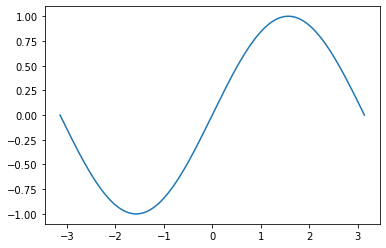

In [26]:
plt.plot(X, Y)
plt.show()

In [27]:
#Start with parameters initialized to random values
a, b, c, d = torch.randn(()), torch.randn(()), torch.randn(()), torch.randn(())

An important parameter in gradient descent is the step size, commonly called the "Learning Rate." Often the optimal learning rate will need to be empirically determined. Choose a value here--you may need to come back and update later!

In [28]:
learning_rate =

We'll now set up a _training loop_ to estimate our model. Training loops implement part (3) of the above recipie: estimating optimal model parameters via repeated backpropagation. The essential steps are:

- For n _epochs_ do:
  - Get the model's output at each data point (The _forward pass_)
  - Compare the model's outputs to the correct values using a _loss function_
  - Use backpropagation to find the model's gradient for each parameter (The _backward pass_)
  - Update parameters according to their gradients

In the next section, fill in the indicated lines to use these steps to optimize the parameters in our toy example. We will use Mean Squared Error (MSE) as the loss function:

$$L(y, \hat{y}) = \sum_{i=1}^n (\hat{y}_i - y_i)^2$$

To compute the gradients (really just the derivatives in this case) with respect to the loss, remember that the chain rule applies here, so we will have:

$$\frac{dL}{d\hat{y}} = 2(\hat{y}_i - y_i)$$

Which then gives:

$$\frac{dL}{da} = \frac{dL}{d\hat{y}} \frac{d\hat{y}}{da} = \frac{dL}{d\hat{y}} \frac{dp(\hat{x})}{da} = 2(\hat{y}_i - y_i)\hat{x}^4$$



In [29]:
n_epochs = 1000

for _ in range(n_epochs):

  # Run each value through the model (we do this as a batch)
  y_preds = a * X**3 + b * X**2 + c * X + d
  
  # TOOD: Compute the loss according to the formula above

  # Compute the gradient of y_preds with respect to the loss
  grad_y_preds = 2.0 * (y_preds - Y)

  # Compute the gradient with respect to a
  grad_a = (grad_y_preds * X**3).sum()
  
  # TODO: Compute gradient with respect to the other parameters

  # Update a with gradient descent
  a -= learning_rate * grad_a
  
  # TODO: Update the other parameters using gradient descent
  

Great! Now let's check how we did by plotting the estimated curve

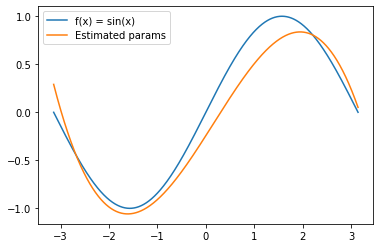

In [30]:
plt.plot(X, Y, label='f(x) = sin(x)')
plt.plot(X, a * X**3 + b * X**2 + c * X + d, label = 'Estimated params')
plt.legend()
plt.show()

We should see a relatively good approximation of $sin(x)$. (Not perfect). If the solution doesn't look right, or if the parameter values are `nan`, try adjusting the learning rate above! Hint: something $\leq 10^{-6}$ may be needed.

##### b) **Parameter Estimation in PyTorch Style**

(Also adapted from [PyTorch Tutorials](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html))

In this example we will repeat the same exercise as above, but in a more PyTorch-y style. Most of this is filled in for you, as an instructive example. First, let's mention a few key PyTorch objects:

1. Modules (`torch.nn.module`) are the base class for all neural network models. All models are a subclass of `module`. In addition, most sub-parts of models you create will be subclasses of `module`. Subclasses must implement a few key functions:
  - `__init__` constructs the model
  - `forward` Defines the way a module processes data to create an output
  - `backward` Computes the gradient for each parameter in the model.
  - Note: the `__call__` method in `module` calls `forward`

2. DataLoaders (`torch.utils.data.DataLoader`) combines two things:
  - A Dataset (`torch.utils.data.Dataset`)
  - A Sampler (` torch.utils.data.Sampler`) Note, the sampler is often ommited, since default behavior is usually sufficent
To produce an interatable dataset batched in an appropriate way

In this section we will re-implement the earlier example with these new objects

In [31]:
# Redefine our X and Y data
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

## First, in this example it is easier to precompute the powers of x. We create a (2000x3) tensor 'xx' with 
# [ [ x^1 ],
#   [ x^2 ],
#   [ x^3 ] ]
# 
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

First we will set up our model. A few useful PyTorch sub modules for this exercise:

 - Linear Layers ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)) are fully connected layers. They apply the transformation $y = xA^T + b$ where $x$ is input data of dimension $(w_i, h_i)$, $A$ is a matrix of weights with dimensions $(w_j, h_j)$, and $b$ is a matrix of biases with dimension $(w_i, w_j)$. The layer is initialized by calling `torch.nn.Linear(w_i, w_j)`
 - Flatten "Layer" ([`torch.nn.Flatten`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)) flattens a tensor by eliminating $\geq1$ dimension and "flattening" the data into the remaining dimensions. 

In [34]:
##  This model runs a linear layer and then a flatten layer sequentially.  

class PolyModel(torch.nn.Module):
  
  def __init__(self):
    super(PolyModel, self).__init__()
    self.linear = torch.nn.Linear(3, 1)
    self.flatten = torch.nn.Flatten(0, 1)

  def forward(self, x):
    return self.flatten(self.linear(x))

Now we will make the DataLoader for this dataset. First we need to produce a pytorch dataset from `X` and `Y`. A guide to creating a custom dataset can be found [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files).

In [35]:
class PolyDataset(torch.utils.data.Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.len = self.X.shape[0]

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return self.len

Now we need to create a coresponding DataLoader object, which will serve up (X, y) pairs. In the DataLoader we need to specify a _batch size_, which indicated how many pairs are served simultaneously. We could serve all at once, as in the previous example, but here we'll just use a more common value, 64. 

In [36]:
data = PolyDataset(xx, y)
poly_dataloader = torch.utils.data.DataLoader(dataset=data, batch_size=64, shuffle=True)

In the previous problem we defined our Loss Function by hand. PyTorch has a wide variety of Loss Functions already implemented, and we can use one of them here:

In [37]:
loss_fn = torch.nn.MSELoss()

A final piece of the PyTorch training loop is the Optimizer, which is responsible for updating the parameters of our model. One common Optimizer is the Stochastic Gradient Descent optimizer (`torch.optim.SGD`). An optimizer is constructed by passing it the model parameters we want it to optimize for us. 

In [38]:
model = PolyModel()
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Now we can create a more PyTorch-y training loop for the problem. It follow the same basic format as before, but without many of the tedious steps because of the PyTorch objects being used. 

In [ ]:
from tqdm import tqdm

# TODO: fill in the missing lines in the training loop
n_epochs = 500

for _ in tqdm(range(n_epochs)):

  for X, Y in poly_dataloader:

    # Create predictions by running the model on X
    preds = 

    # Compute the loss with the loss function defined above
    loss = 

    # Zero the optimizer grads by calling optimizer.zero_grad()

    # Call the `backward` function on the loss to compute the gradients

    # Call `step` on the optimzer to update the parameters


When the training loop is finished, we can again compare the two functions

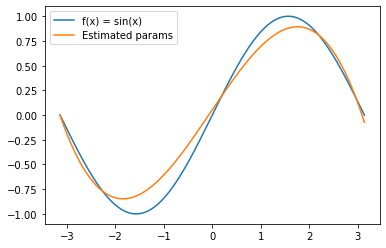

In [40]:
with torch.no_grad():
  model_preds = model(xx).detach().numpy()

plt.plot(x, y, label='f(x) = sin(x)')
plt.plot(x, model_preds, label = 'Estimated params')
plt.legend()
plt.show()

##### c) **Approximting a nonlinear function**

(Adapted from [datacamp](https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch))

In this exercise we will train a simple neural net to predict which nonlinearlly-seperated cluster a data point belongs too. Here is the dataset we will be using:

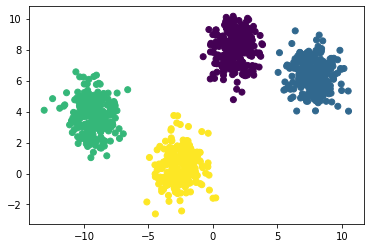

In [55]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 4, random_state = 20)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In this exercise you will need to:

1. Create a Dataset class and associated DataLoader that serves up X, y pairs
2. Create a custom neural model with three layers:
  - An 2-d input layer (the original data)
  - A 10-d hidden layer (fully connected)
  - A n-d (where n=number of blobs, 4 in this case) output layer

  The model will also have two _activation_ functions: a nonlinear `ReLu` function on the hidden layer and a `softmax` function on the output layer. 

3. Initialize a loss function and optimizer for this problem

4. Create and run a training loop (similar to above) to teach the model how to predict clusters. 

5. Evalute the model's preformance. 

We provide some code, but you will need to do most on your own, following previous examples.

**1. Create Datasets and DataLoaders for this dataset**


In [64]:
### Randomly split the data into a test and training set: 80% train and 20% test

### Create a custom dataset class for this data, following the example above
# You will likely need to use the torch.from_numpy function

# Initialize a train dataset and associated train dataloader . Use batch_size = 64

train_dataloader = 

# Initialize a train dataset and associated train dataloader. Use batch_size = 1.

test_dataloader = 

**2. Create a neural model for this data**

Here we will create a custom model for this problem. Follow the instructions provided in comments for each layer, and then create the `forward` method to run data through each of them sequentially. This model uses [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers and [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) and [SoftMax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) activation functions. 

In [65]:
class CustomModel(torch.nn.Module):
  
  def __init__(self):
    super(CustomModel, self).__init__()
    # Create a linear layer from 2 to 10 dimensions

    # Create a ReLU activation 'layer'

    # Create a linear layer from 10 to 4 dimensions

    # Create a softmax 'layer'

  # Write the forward method to apply each of the layers sequentially in the order they were defined above
  def forward(self, x):
    return 

**3. Initialize Loss and Optimizer**

In this problem we will use [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html). Intunitively, Cross Entropy Loss "rewards" models that produce a high value corresponding to the correct class and very low values for the other classes. 

In [66]:
learning_rate = 0.1

## Initialize a Cross Entropy Loss Function

## Initializer the model and optimizer
model = 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

**4. Create and run a training loop for this problem. See above for an example**

Fill in the missing steps. Training loops implemented with PyTorch tend to look _very_ similar.


In [ ]:
from tqdm import tqdm

# TODO: fill in the missing lines in the training loop

n_epochs = 100

for _ in tqdm(range(n_epochs)):

  for X, y in train_dataloader:

    # Create predictions by running the model

    # Compute the loss with the loss function defined above

    # Zero the optimizer grads by calling optimizer.zero_grad()

    # Call the `backward` function on the loss to compute the gradients

    # Call `step` on the optimzer to update the parameters


**5. Evaluate the Model**

Run the model on each value in your test dataloader. How does the model do? We use `torch.no_grad` to tell the model not to track gradients for these observations. Model preformance may vary, but if you see less that 95% accuracy you may need to double check your model design. 

In [69]:
n_correct = 0

with torch.no_grad():
  for X, y in test_dataloader:
    # TODO: Check if the model has predicted this observation accurately. The predicted class is the index of the highest value in the output (hint: use np.argmax)

print(n_correct / len(test_data))

1.0


<ipython-input-65-24a46cad0a29>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(self.linear_two(self.relu(self.linear_one(x))))


##### **d) Classifying Handwritten Digits**

(Adapted from [Nextjournal](https://nextjournal.com/gkoehler/pytorch-mnist))

In this final exercise, we will repeat the same steps, but for a new dataset, and with a new kind of model. The dataset we'll be working with is the NMIST Digits dataset (you've probably encountered this set before if you've taken other ML/Deep Learning Courses). 

Here we'll grab the dataset and show a few examples:

In [ ]:
from matplotlib import pyplot as plt
import torch
import torchvision
  
train_data = torchvision.datasets.MNIST('/files/', train=True, download=True)
test_data = torchvision.datasets.MNIST('/files/', train=False, download=True)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(train_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(train_data[i][1]))
  plt.xticks([])
  plt.yticks([])
fig

Our goal here is very simple: given the image of a digit presented here, train a model to determine which digit is shown. Of course, this is trivial for humans, but extremely difficult for a computer without neural methods. 

In this case, we will use a Convolutional Neural Net (CNN) to classify images. The process will take a nearly identical form as the earlier example, with only a slightly more complex model, reflecting the more complex nature of the task. 

**1. Create Datasets and Dataloaders**

Lines to bring in the data and transform to a reasonable format for PyTorch is provided. You will just need to set up a DataLoader object.

In [71]:
#Create the datasets
train_dataset = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_dataset = torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

train_batch_size = 64
test_batch_size = 1

# TODO: Create test and train DataLoaders for this dataset
train_loader = 
test_loader =

**2. Create a neural model for this data**

Here we will create a custom model for this problem. Follow the instructions provided in comments for each layer, and then create the `forward` method to run data through each of them sequentially. 

In this model we will use the following parts, each of which is the composition of a few layers (except step 3, which is done for you):


1.   A 5x5 [convolutional layer](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) with 1 input channel and 10 output channels. Follow this layer with a 2x2 [max pool step](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) and a [ReLU function](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
2.   A 5x5 [convolutional layer](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) with 10 input channels and 20 output channels. Follow this layer with a [2d dropout step](https://pytorch.org/docs/stable/generated/torch.nn.Dropout2d.html), a 2x2 [max pool step](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), and a [ReLU function](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html). 
3. A step that [flattens](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) the data into a 1-d tensor (provided)
4. A [fully connected (linear)](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer with 320 input features and 50 output features, followed by a [ReLU function](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) and _then_ a [1-d dropout step](https://pytorch.org/docs/stable/generated/torch.nn.Dropout1d.html). 
5. A final [full connected (linear)](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer with 50 input features and 10 output features. These final 10 features will each represent one of the possible digits. Follow this layer with a [softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html). 

We don't go into detail here regarding what exactly each of these layers are doing, but please take a moment to review the PyTorch documentation if you're not familar with these core functions. 

In [72]:
class DigitsModel(torch.nn.Module):
  def __init__(self):
    super(DigitsModel, self).__init__()

    # TODO: Define each of the layers described above, in order

    ## 1: First convolutional layer, with additional maxpool and relu steps
    self.conv1 = 
    self.maxpool1 = 
    self.relu1 = 

    ## 2: Second convolutional layer, with additional steps
    self.conv2 = 
    self.dropout1 = 
    self.maxpool2 =
    self.relu2 = 

    ## 4: First fully connected layer, with additional steps
    self.fc1 = 
    self.relu3 = 
    self.dropout2 = 

    ## 5: Second fully connected layer, with additional steps
    self.fc2 = 
    self.softmax = 

  def forward(self, x):
    # Step 1: output shape should be 64x10x12x12
    x = self.relu1(self.maxpool1(self.conv1(x)))

    # Step 2: output shape should be 64x20x4x4
    x = self.relu2(self.maxpool2(self.dropout1(self.conv2(x))))

    # Step 3: output shape should be 64x320
    x = x.view(-1, 320)

    # Step 4: output shape should be 64x50
    x = self.dropout2(self.relu3(self.fc1(x)))

    # Step 5: output shape should be 64x10
    x = self.softmax(self.fc2(x))

    # Return the output
    return x

**3. Create a loss function and optimizer**

We again use Cross Entropy Loss and a SGD Optimizer for this problem! This should look _very_ similar to the loss function and optimizer from the last problem. Since we are using a larger model, we'll run this training on a GPU. Calling `model.cuda()` as seen below, moves the model to a GPU resource. With this optimizer we also introduce _momentum_, which will be discussed at length later in the course. For now, pass `momentum` as a parameter into the optimizer.  

In [73]:
learning_rate = 0.01
momentum = 0.5

## Initialize Cross Entropy Loss Function

## Initializer the model and optimizer
model = 
model = model.cuda()
optimizer = 

**4. Create and run a training loop for this problem**

Again, training looks tend to look very similar, since most of the logic is abstracted away. In Colab with a GPU, this process seems to take about two minutes. 

In [ ]:
from tqdm import tqdm

# TODO: fill in the missing lines in the training loop

n_epochs = 10

for _ in tqdm(range(n_epochs)):

  for X, y in train_loader:

    # Move X and y to the GPU
    
    # Create predictions by running the model

    # Compute the loss with the loss function defined above

    # Zero the optimizer grads by calling optimizer.zero_grad()

    # Call the `backward` function on the loss to compute the gradients

    # Call `step` on the optimzer to update the parameters


**5. Evaluate the Model**

Run the model on the first 100 values in your test dataloader. How does the model do? This should also look very similar to the previous example. Preformance may vary, but if you see accuracy <60% consider checking if there may be a mistake in the model. 

Note that we use `model.eval()` to switch the model from training mode into evaluation mode. This is **very important**. The dropout layers will still "dropout" important features if not used here. 

In [ ]:
count = 0
model.eval()

with torch.no_grad():
  for X, y in test_loader:
    count += 1
    if count > 100:
      break
    
    # Move X and y to the GPU

    # Run the model on X. Move the output back to the CPU for comparison

    # Check if the model has predicted accurately 
    
